!kaggle datasets download -d lexset/synthetic-asl-alphabet

In [2]:
from zipfile import ZipFile
file_name = "synthetic-asl-alphabet.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")

Done


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image


In [4]:
for i in os.listdir('Train_Alphabet'):
  print((i),len(os.listdir('Train_Alphabet/'+i))) 

G 900
M 900
Q 900
D 900
C 900
L 900
V 900
F 900
J 900
R 900
X 900
N 900
Y 900
I 900
P 900
W 900
S 900
E 900
Blank 900
K 900
Z 900
H 900
T 900
A 900
O 900
B 900
U 900


In [5]:
X_train=[]
y_train=[]
X_train_path='/kaggle/working/Train_Alphabet'
for i in os.listdir(X_train_path):
  count=0
  for j in os.listdir(X_train_path+'/'+i):
    if count==450:
        break
    if i!='Blank':
      img=Image.open(X_train_path+'/'+i+'/'+j).convert('L')
      img=img.resize((48,48))
      img=np.reshape(img,(48,48,1))
      img=np.array(img)
      img=img/255
      X_train.append(img)
      y_train.append(i)
      count=count+1

In [6]:
len(X_train)

11700

In [7]:
len(y_train)

11700

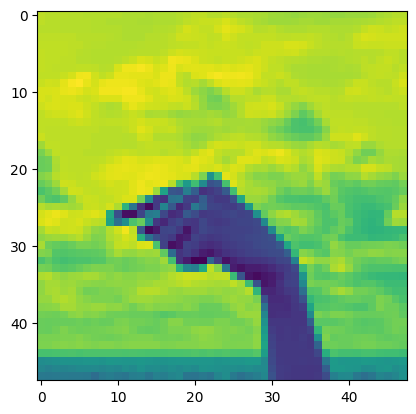

In [8]:
plt.imshow(X_train[0])


In [9]:
y_train[0]


'G'

In [10]:
X_train=np.array(X_train)
y_train=np.array(y_train)

In [11]:
type(X_train[0])

numpy.ndarray

In [12]:
X_train.shape

(11700, 48, 48, 1)

In [13]:
X_test=[]
y_test=[]
X_test_path='/kaggle/working/Test_Alphabet'
for i in os.listdir(X_test_path):
  for j in os.listdir(X_test_path+'/'+i):
    if i!='Blank':
      img=Image.open(X_test_path+'/'+i+'/'+j).convert('L')
      img=img.resize((48,48))
      img=np.reshape(img,(48,48,1))
      img=np.array(img)
      img=img/255
      X_test.append(img)
      y_test.append(i)
      count=count+1

In [14]:
X_test=np.array(X_train)
y_test=np.array(y_train)

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
lb=LabelEncoder()

In [17]:
class_labels = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')
label_encoding = {label: idx for idx, label in enumerate(class_labels)}
label_decoding = {idx: label for label, idx in label_encoding.items()}

In [18]:
# Function to encode labels
def encode_labels(labels):
    return [label_encoding[label] for label in labels]

# Function to decode labels
def decode_labels(encoded_labels):
    return [label_decoding[label] for label in encoded_labels]

In [19]:
y_train_label = encode_labels(y_train)
y_test_label = encode_labels(y_test)

In [20]:
y_train_label[450]

12

In [21]:
y_train[450]

'M'

In [24]:
y_train_label=np.array(y_train_label)
y_test_label=np.array(y_test_label)

In [25]:
X_train.shape

(11700, 48, 48, 1)

In [26]:
y_train_label.shape

(11700,)

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Sequential

2024-07-12 19:49:44.208761: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 19:49:44.208859: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 19:49:44.336798: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [28]:
model=Sequential()
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(48,48,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(26,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(X_train,y_train_label,epochs=10,batch_size=32,validation_data=(X_test,y_test_label))

Epoch 1/10
 24/366 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0219 - loss: 3.2958

I0000 00:00:1720813804.902553     195 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


366/366 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.0657 - loss: 3.1685 - val_accuracy: 0.5762 - val_loss: 1.3540
Epoch 2/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5513 - loss: 1.4186 - val_accuracy: 0.8313 - val_loss: 0.5960
Epoch 3/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7658 - loss: 0.7486 - val_accuracy: 0.9012 - val_loss: 0.3467
Epoch 4/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8384 - loss: 0.4949 - val_accuracy: 0.9498 - val_loss: 0.2000
Epoch 5/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8818 - loss: 0.3601 - val_accuracy: 0.9681 - val_loss: 0.1212
Epoch 6/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9045 - loss: 0.2905 - val_accuracy: 0.9794 - val_loss: 0.0939
Epoch 7/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9202 - loss: 0.2318 - val_accuracy: 0.9804 - val_loss: 0.0780
Epoch 8/10
366/366 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9352 - loss: 0.2022 - val_accuracy: 0.9888 - va

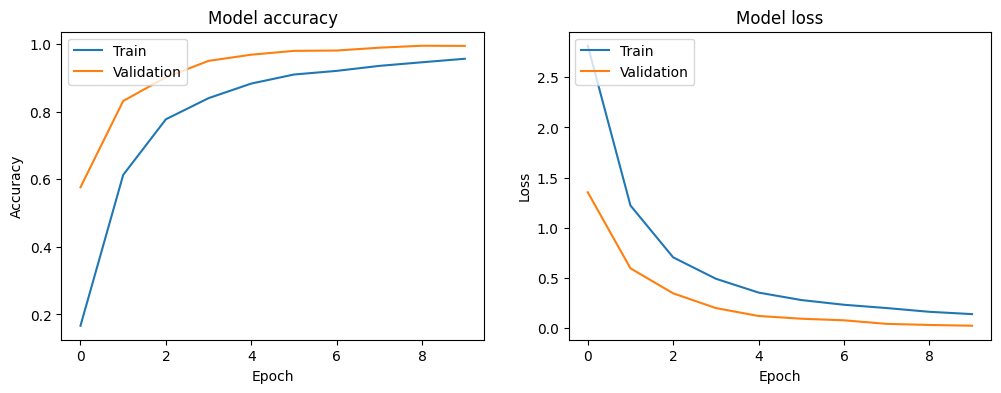

In [35]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [36]:
def preprocessing(image):
    image=Image.open(image).convert("L")
    image=image.resize((48,48))
    image=np.reshape(image,(48,48,1))
    image= np.expand_dims(image, axis=0)
    image=np.array(image)
    image=image/255
    return image

    
    

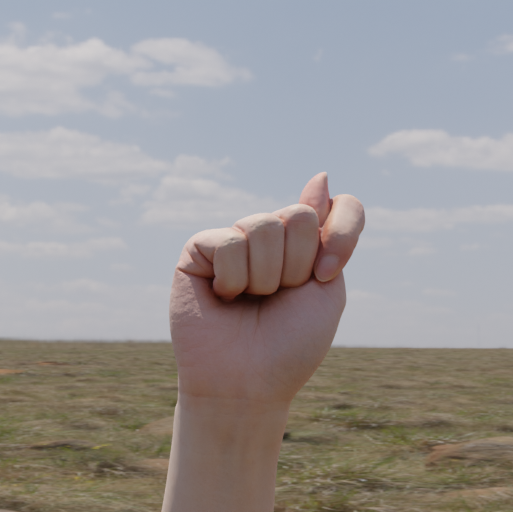

In [42]:
Image.open("/kaggle/working/Test_Alphabet/T/ca59bc8d-74dd-46e8-a497-2be7f6cf4d71.rgb_0000.png")

In [43]:
prediction=np.argmax(model.predict((preprocessing('/kaggle/working/Test_Alphabet/T/ca59bc8d-74dd-46e8-a497-2be7f6cf4d71.rgb_0000.png'))))
print(decode_labels([prediction]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
['T']


In [39]:
model.save('my_model.h5')